<h1 style="margin-bottom: 10px;font-size:3rem;color:#4c76ce;text-align:center;">
    Getting Started with Pandas</h1>

<h2 style="margin-bottom: 25px;font-size:2.5rem;text-align:center;">
    Part II - Data Structures: Dataframes</h2>
    
<img src="https://raw.githubusercontent.com/lajmcourses/Images/master/pandas.png"
     style="position:absolute;top:5px;left:5px;height:100px;width:auto;margin-bottom:5px;">


## Prerequisites

Dataset that we will use in order to explore **dataframes** is called **video_games_sales.csv**. This dataset contains video games sales data.

Dataset can be downloaded from https://www.kaggle.com/gregorut/videogamesales.

Dataset should be saved to the project directory called *data*.

In [108]:
# Run this code and check if you have all the Python packages installed

import numpy as np
import pandas as pd

# Getting version of Pandas
print("My Pandas version:", pd.__version__)

My Pandas version: 2.0.3


# 2. Pandas DataFrames


A **DataFrame** is a most widely used data structure in Pandas. It is used to represent tabular data. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

The DataFrame represents a rectangular table of data and contains an ordered named collection of columns, each of which can be of a different value type (numeric, string, boolean, etc.) The DataFrame has both row and column index.

## 2.1 Creating a DataFrame

Pandas DataFrame can be created from

a) a dictionary of lists;

b) a list of dictionaries;

c) from another DataFrame


In [109]:
import pandas as pd

# DataFrame can be created from a dictionary of lists. (Define the DataFrame by columns.)

people = {
    "first_name": ["John", "Jane", "Peter", "Linda"],
    "last_name": ["Doe", "Xing", "Parker", "Jackson"],
    "email": ["john@email.com", "jane@email.com", "peter@email.com", "linda@email.com"],
    "age": [20, 22, 21, 21]
}

df_people = pd.DataFrame(people)

# df_people is a Pandas DataFrame
print("\nType of object df_people:", type(df_people))

display(df_people)


Type of object df_people: <class 'pandas.core.frame.DataFrame'>


,first_name,last_name,email,age
0,John,Doe,john@email.com,20
1,Jane,Xing,jane@email.com,22
2,Peter,Parker,peter@email.com,21
3,Linda,Jackson,linda@email.com,21


In [110]:
import pandas as pd

# DataFrame can be created from a list of dictionaries. (Defining dataframe by rows (records).)

employees = [
    {"first_name": "John", "last_name": "Doe", "payroll_no": "P1200"},
    {"first_name": "Peter", "last_name": "Parker", "payroll_no": "P1108"},
    {"first_name": "Jane", "last_name": "Xing", "payroll_no": "P1020"}
]

df_employees = pd.DataFrame(employees)

# df_employees is a Pandas DataFrame
print(type(df_employees))

df_employees

<class 'pandas.core.frame.DataFrame'>


,first_name,last_name,payroll_no
0,John,Doe,P1200
1,Peter,Parker,P1108
2,Jane,Xing,P1020


In [111]:
# Creating a dataframe from an existing dataframe
import pandas as pd

# Define initial DataFrame
employees = [
    {"first_name": "John", "last_name": "Doe", "payroll_no": "P1200"},
    {"first_name": "Peter", "last_name": "Parker", "payroll_no": "P1108"},
    {"first_name": "Jane", "last_name": "Xing", "payroll_no": "P1020"}
]

df_employees = pd.DataFrame(employees)

# Create a new DataFrame based on the existing DataFrame
df_employee_salary = pd.DataFrame(
    df_employees,
    columns = ["payroll_no", "first_name", "last_name", "annual_salary"]
)

# Add a new column 'annual_salary' to the DataFrame
df_employee_salary["annual_salary"] = [45000, 37500, 39750]

display(df_employee_salary)

,payroll_no,first_name,last_name,annual_salary
0,P1200,John,Doe,45000
1,P1108,Peter,Parker,37500
2,P1020,Jane,Xing,39750


## 2.2 Getting Information about the DataFrame

In [112]:
# DataFrame column index
print("\nColumn index:", df_employee_salary.columns)

# DataFrame row indexes
print("\nRow index:", df_employee_salary.index)


Column index: Index(['payroll_no', 'first_name', 'last_name', 'annual_salary'], dtype='object')

Row index: RangeIndex(start=0, stop=3, step=1)


In [113]:
# DataFrame Shape
print("DataFrame shape:", df_employee_salary.shape)

DataFrame shape: (3, 4)


In [114]:
# Data types
print("Data types used:")
print(df_employee_salary.dtypes)

Data types used:
payroll_no       object
first_name       object
last_name        object
annual_salary     int64
dtype: object


## 2.3 Selecting a Column

In [115]:
# Method 1

df_people["first_name"]


0     John
1     Jane
2    Peter
3    Linda
Name: first_name, dtype: object

In [116]:
# dataframe column data type

print(type(df_people["first_name"]))

<class 'pandas.core.series.Series'>


In [117]:
# Method 2, but this is not recommended way

df_people.first_name

0     John
1     Jane
2    Peter
3    Linda
Name: first_name, dtype: object

In [118]:
# Method 3, returns a DataFrame

df_people[["first_name"]]

,first_name
0,John
1,Jane
2,Peter
3,Linda


In [119]:
# Data type
print(type(df_people[["first_name"]]))

<class 'pandas.core.frame.DataFrame'>


## 2.4 Selecting Multiple Columns

In [120]:
# Selecting multiple columns:

df_people[["first_name", "last_name"]]

,first_name,last_name
0,John,Doe
1,Jane,Xing
2,Peter,Parker
3,Linda,Jackson


In [121]:
# Datatype of resulting data set

print(type(df_people[["first_name", "last_name"]]))

<class 'pandas.core.frame.DataFrame'>


## 2.5 Selecting Rows

#### Selecting a Single Row

Before moving on let's add employee ID for each person in the dataset, and let's set the **ID** as the dataframe index.

In [122]:
ID = pd.Series(["E01", "E02", "E03", "E04"])
df_people.index = ID

df_people

,first_name,last_name,email,age
E01,John,Doe,john@email.com,20
E02,Jane,Xing,jane@email.com,22
E03,Peter,Parker,peter@email.com,21
E04,Linda,Jackson,linda@email.com,21


In [123]:
# Method 1: Selecting a row using iloc

df_people.iloc[0]

first_name              John
last_name                Doe
email         john@email.com
age                       20
Name: E01, dtype: object

In [124]:
# Method 2: Selecting a row using loc

df_people.loc["E01"]

first_name              John
last_name                Doe
email         john@email.com
age                       20
Name: E01, dtype: object

#### Selecting Multiple Rows

In both cases first row is selected.

In [125]:
# Selecting multiple rows using iloc

df_people.loc[["E01", "E03"]]

,first_name,last_name,email,age
E01,John,Doe,john@email.com,20
E03,Peter,Parker,peter@email.com,21


We selected the first and the third rows. Please note that row index in Pandas starts from 0.

## 2.6 Selecting Rows and Columns

In [126]:
# Let's get emails of John and Peter using iloc

df_people.iloc[[0, 2], 2]

E01     john@email.com
E03    peter@email.com
Name: email, dtype: object

In [127]:
print(type(df_people.iloc[[0, 2], [2]]))

<class 'pandas.core.frame.DataFrame'>


In [128]:
# Let's get emails of John and Peter using loc

df_people.loc[["E01", "E02"], "email"]

E01    john@email.com
E02    jane@email.com
Name: email, dtype: object

In [129]:
print(type(df_people.loc[["E01", "E02"], "email"]))

<class 'pandas.core.series.Series'>


Please note that the result of the two last operations is a Series. But with a slight modification it is possible to get a dataframe.

In [130]:
# Getting selection as a dataframe

df_people.iloc[[0, 2], [2]]

,email
E01,john@email.com
E03,peter@email.com


In [131]:
# Getting selection as a dataframe

df_people.loc[["E01", "E02"], ["email"]]

,email
E01,john@email.com
E02,jane@email.com


## Exercises 1:

a) Create a dataframe containing weather observations. Set Date as index. 

Each weather observation contains temperature and wind speed:

Date: 2022-03-01, Temperature: 5 $^{\circ}$, Wind Speed: 8.2 

Date: 2022-03-02, Temperature: 3 $^{\circ}$, Wind Speed: 5.8

Date: 2022-03-03, Temperature: -2 $^{\circ}$, Wind Speed: 5

Date: 2022-03-04, Temperature: 0 $^{\circ}$, Wind Speed: 5.3

Date: 2022-03-05, Temperature: 2 $^{\circ}$, Wind Speed: 6 


b) How many of rows and columns the dataframe has?


c) Select and display the weather observation on 2022-03-03


d) Select and display the temperature data only as Pandas Series


f) Select and display the wind data only as a DataFrame.


g) Select and display the data only for those days when the wind speed was less than 6 m/s

In [132]:
# Solution to Exercises: Create DataFrame containing weather observations
import pandas as pd

obs = [
    {"Date": "2022-03-01", "Temperature": 5, "WindSpeed": 8.2},
    {"Date": "2022-03-02", "Temperature": 3, "WindSpeed": 5.8},
    {"Date": "2022-03-03", "Temperature": -2, "WindSpeed": 5},
    {"Date": "2022-03-04", "Temperature": 0, "WindSpeed": 5.3},
    {"Date": "2022-03-05", "Temperature": 2, "WindSpeed": 6.0},
    
]

df_weather = pd.DataFrame(data=obs)
df_weather.set_index("Date", inplace=True)
display(df_weather)

# Number of rows and columns in the created DataFrame
nrows, ncols = df_weather.shape
print(f"Number of rows: {nrows}", f"Number of columns: {ncols}")

# Observation son 2022-03-03
display(df_weather.loc[["2022-03-03"], :])

# Displaying Temperature data only
display(df_weather[["Temperature"]])

# Displaying Wind data only
display(df_weather[["WindSpeed"]])

# Observations with the wind speed < 6 m/s
flt = df_weather["WindSpeed"] < 6
display(df_weather.loc[flt, :])

,Temperature,WindSpeed
Date,,
2022-03-01,5,8.2
2022-03-02,3,5.8
2022-03-03,-2,5.0
2022-03-04,0,5.3
2022-03-05,2,6.0


Number of rows: 5 Number of columns: 2


,Temperature,WindSpeed
Date,,
2022-03-03,-2,5.0


,Temperature
Date,
2022-03-01,5
2022-03-02,3
2022-03-03,-2
2022-03-04,0
2022-03-05,2


,WindSpeed
Date,
2022-03-01,8.2
2022-03-02,5.8
2022-03-03,5.0
2022-03-04,5.3
2022-03-05,6.0


,Temperature,WindSpeed
Date,,
2022-03-02,3,5.8
2022-03-03,-2,5.0
2022-03-04,0,5.3


## 2.7 Reading Data from CSV file

In [133]:
# Read data from the CSV file
import pandas as pd

df_sales = pd.read_csv("data/video_games_sales.csv")

df_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [134]:
# Reading data with Rank as an index

df_sales_with_index = pd.read_csv("data/video_games_sales.csv", index_col="Rank")

df_sales_with_index.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 2.8 Viewing the Data 

In [135]:
# Display first n rows:

n = 10

df_sales.head(n)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [136]:
# Display last n rows

n = 5

df_sales.tail(n)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


## 2.9 Number of Rows and Columns

In [137]:
# Shape of dataframe

nrows, ncols = df_sales.shape

print(f"\nThe df_sales dataframe has {nrows} rows and {ncols} columns.")


The df_sales dataframe has 16598 rows and 11 columns.


## 2.10 Columns Data Types

In [138]:
# Data Types

df_sales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## 2.11 Rows Indexing

In the section above we briefly spoke about indexing. The index is displayed on the leftmost side of the dataframe.

In [139]:
df_sales.index

RangeIndex(start=0, stop=16598, step=1)

#### Is Rank Unique?

In [140]:
# Checking Rank uniqueness
print("Rank is unique:", df_sales["Rank"].is_unique)

# Unique Rank values:
print("Unique Rank values:", df_sales["Rank"].unique())

Rank is unique: True
Unique Rank values: [    1     2     3 ... 16598 16599 16600]


## 2.12 Exploring Categorical Variables

**Video Games Sales** dataset has the variables such as **Platform**, **Genre**, and **Publisher**. Those variables are categorical variables. It would be interesting to know how many games belong to a particualar category. 

Let's find out how many genres do we have, and how many games belong to each genre.

In [141]:
# Video Games Genres

df_sales["Genre"].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [142]:
# Number of unique genres in the dataset
len(df_sales["Genre"].unique())

12

## 2.13 Descriptive Statistics

Before starting to analyze the data, it is usefult to extract the dataset descriptive statistics, it will give you an initial idea about the data and the data quality.

In [143]:
# Descriptive Statistics of the Dataset

df_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Please note that our Video Games Dataset has eleven columns in total, and statistics is displayed only for columns containing numerical values. It is possible to enforce statistic calculation for other data types:

In [144]:
# Enforcing statistic calculation for columns with object data type

df_sales.describe(include=object)

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


The table above provides us with a couple of useful insights:

1. Our dataset contains 11493 unique game names.

2. In the dataset we have games of 12 unique genres.

3. Our dataset contains 31 unique game platforms, and 578 unique game publishers.

4. The most frequent game genre is **Action**, there are 3316 games with this genre.

5. We have some missing values in the **Year** column

6. We have some missing values in the **Publisher** column

#### 2.14 Missing Values

In order to find the entries with missing values in Panda's Series or in Panda's Dataframe 
we can use the method:

```
pd.isna(data)
```

If we would need to filter the entries with no missing values we would use:

```
pd.notna(data)
```


In [145]:
# Let's find the entries with missing Year values

df_sales[pd.isna(df_sales["Year"])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


## Exercise 2:

The directory called *data* contains a file *advertising.csv*. This file contains the advertising expenses and sales volumes. Your task is

a) Read the data into Pandas dataframe, and name the data frame df_advertising. Please note that the very first column of the dataset contains observation id, it should be either ignored or read as an index.

b) How many rows are in the dataframe? How many columns the dataframe contain?

c) What are the average TV advertising expenses? What are the average sales?

d) Are there any missing values in the dataset? If yes what are they?

e) Make a plot showing Sales against TV advertising expenses.

In [146]:
# Solution to Exercise 2:
import pandas as pd

# (a)
dfile = "data/advertising.csv"
df_advertising = pd.read_csv(dfile, index_col=0)
display(df_advertising.head())

# (b): number of rows and columns
nrows, ncols = df_advertising.shape
print(f"Number of rows: {nrows}. Number of columns: {ncols}.")

# (c)
print("\nAverage TV advertising expenses: {0}. \nAverage sales: {1}".format(df_advertising["TV"].mean(), df_advertising["sales"].mean()))

# (d): missing data: the dataset contains no missing data
print("\nMissing TV entries:", len(df_advertising["TV"][df_advertising["TV"].isna()]))
print("Missing Radio entries:", len(df_advertising["radio"][df_advertising["radio"].isna()]))
print("Missing Newspaper entries:", len(df_advertising["newspaper"][df_advertising["newspaper"].isna()]))
print("Missing Sales entries:", len(df_advertising["sales"][df_advertising["sales"].isna()]))

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Number of rows: 200. Number of columns: 4.

Average TV advertising expenses: 147.0425. 
Average sales: 14.0225

Missing TV entries: 0
Missing Radio entries: 0
Missing Newspaper entries: 0
Missing Sales entries: 0


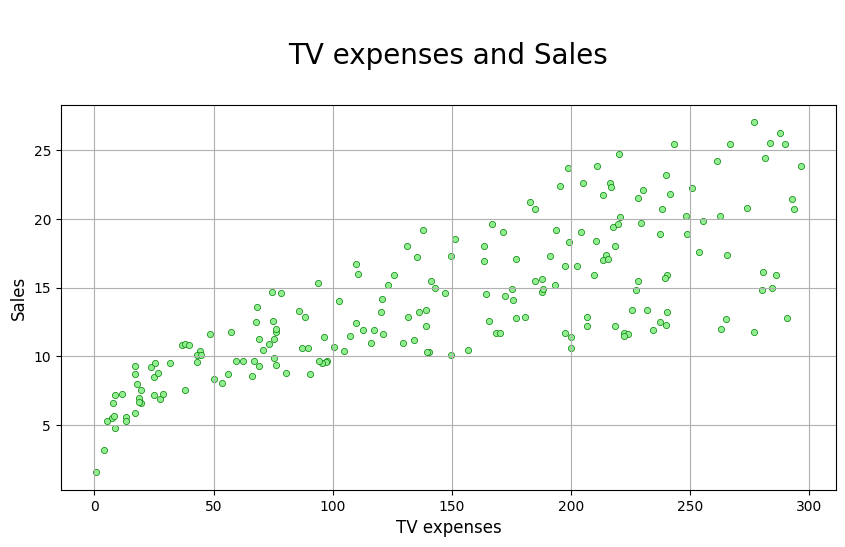

In [147]:
# Exercise 2: (e): Plotting TV expenses versus Sales data

from matplotlib import pyplot as plt
import pandas as pd

# Reading data from file
dfile = "data/advertising.csv"
df_advertising = pd.read_csv(dfile, index_col=0)

# Arranging plot data
tv = df_advertising["TV"]
sales = df_advertising["sales"]

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(tv, sales, s=20, color="lightgreen", edgecolor="green", lw=0.5)
plt.title("\nTV expenses and Sales\n", fontsize=20)

# Axis labels
plt.xlabel("TV expenses", fontsize=12)
plt.ylabel("Sales", fontsize=12)

plt.grid()
plt.show()